# **Imports**

In [1]:
import pandas as pd
import gdown  # to download data from google drive
import gzip   # to decompress downloaded data
import shutil

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_auc_score

In [19]:
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, roc_curve


In [28]:
from sklearn.neighbors import KNeighborsClassifier

#**Load and Split dataset**

In [4]:
def download_data(folder_id):
    url = f"https://drive.google.com/drive/folders/{folder_id}"
    # gdown URL formate
    gdown.download_folder(url=url, output="./downloaded_folder", quiet=False, use_cookies=False)

In [5]:
def decompress_gz(file_path, output_file_name):
    with gzip.open(file_path, 'rb') as f_in:
        with open(output_file_name, 'wb') as f_out:
            shutil.copyfileobj(f_in, f_out)

In [6]:
if __name__ == '__main__':
    # downloading raw dataset
    download_data("14ZG8utOf0Ry76w_T9rqrk5kdhhPIK84P")
    decompress_gz('/content/downloaded_folder/accepted_2007_to_2018Q4.csv.gz', "accepted.csv")

Retrieving folder contents


Retrieving folder 1UGhBnl-1KamEMI_jeSrYZC6Zp7HtmTKf extras
Processing file 1S-aQezZ35nOVke49jPKCJu6bLnePD9P8 decision_tree.png
Processing file 1nnwa05ycQ2vbsmy_0S7QpdZdPNTtZiIV Important features .png
Processing file 1lLc7u5ghmcZowpJhr58MMWNVMywVj7wA Learning Curve Log_Reg.jpg
Processing file 1uj6RpBJ_AphY9647eOkCBPzrQvw9K4la Log_Reg Interpretability.jpg
Processing file 13NX762lSljrdO6XIinOrM7gdjS0pSuAB ROC curve Log_Reg.jpg
Processing file 1thyWynkaoLHijDDfSxD_SEWSbOMONvai accepted_2007_to_2018Q4.csv.gz
Processing file 1IsZAXfIfRwcn1S7gs1TV8vOO15bNmXmK df_cleaned.csv


Retrieving folder contents completed
Building directory structure
Building directory structure completed
Downloading...
From: https://drive.google.com/uc?id=1S-aQezZ35nOVke49jPKCJu6bLnePD9P8
To: /content/downloaded_folder/extras/decision_tree.png
100%|██████████| 292k/292k [00:00<00:00, 20.0MB/s]
Downloading...
From: https://drive.google.com/uc?id=1nnwa05ycQ2vbsmy_0S7QpdZdPNTtZiIV
To: /content/downloaded_folder/extras/Important features .png
100%|██████████| 72.8k/72.8k [00:00<00:00, 21.8MB/s]
Downloading...
From: https://drive.google.com/uc?id=1lLc7u5ghmcZowpJhr58MMWNVMywVj7wA
To: /content/downloaded_folder/extras/Learning Curve Log_Reg.jpg
100%|██████████| 54.3k/54.3k [00:00<00:00, 19.2MB/s]
Downloading...
From: https://drive.google.com/uc?id=1uj6RpBJ_AphY9647eOkCBPzrQvw9K4la
To: /content/downloaded_folder/extras/Log_Reg Interpretability.jpg
100%|██████████| 60.9k/60.9k [00:00<00:00, 7.48MB/s]
Downloading...
From: https://drive.google.com/uc?id=13NX762lSljrdO6XIinOrM7gdjS0pSuAB
To: /

In [7]:
data = pd.read_csv("/content/downloaded_folder/df_cleaned.csv", low_memory=False)
data.head()

,last_pymnt_d,total_rec_prncp,last_pymnt_amnt,out_prncp,total_rec_late_fee,last_fico_range_high,installment,loan_amnt,total_rec_int,out_prncp_inv,...,funded_amnt_inv,recoveries,debt_settlement_flag,hardship_flag,mo_sin_old_rev_tl_op,revol_util,dti,all_util,annual_inc,loan_status
0,17,-0.332581,-0.372797,0.420080,-0.261895,0.281611,-0.473027,-0.461473,0.413942,0.420298,...,-0.461004,-0.445598,0,0,-0.307356,0.608376,0.558953,0.915820,-1.203816,0
1,31,-0.840560,-0.473603,-0.629220,-0.261895,1.244049,-1.608631,-1.601510,-1.081823,-0.629167,...,-1.601271,-0.445598,0,0,-0.187187,-1.880835,-1.233491,-0.049124,0.274631,1
2,27,-0.250720,-0.222228,2.263937,-0.261895,0.883135,1.252073,1.058575,-0.380182,2.264445,...,1.059353,-0.445598,0,0,-0.980297,0.431193,-0.223328,0.379740,2.227297,1
3,39,-0.458023,0.161605,-0.629220,-0.261895,0.161306,-1.364264,-1.373503,-0.909433,-0.629167,...,-1.373218,-0.445598,0,0,-1.472987,0.314511,-0.337836,0.433348,-1.231711,1
4,5,-0.415519,0.220569,-0.629220,-0.261895,0.221459,-1.317547,-1.348168,-0.834440,-0.629167,...,-1.347878,-0.445598,0,0,0.738107,1.273894,0.117928,1.559116,-0.841178,1


In [8]:
X = data.drop('loan_status', axis=1)
y = data['loan_status']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **LightGBM**

In [12]:
import lightgbm as lgb


def LightGbm_model(X_train, y_train, X_test, y_test):
    """
    Train a LightGBM model with given training data and validate on test data.

    Parameters:
    X_train (array-like): Training features
    y_train (array-like): Training labels
    X_test (array-like): Test features
    y_test (array-like): Test labels

    Returns:
    lgb.Booster: Trained LightGBM model
    """
    train_data = lgb.Dataset(X_train, label=y_train)
    valid_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

    params = {
        'learning_rate': 0.1,
        'n_estimators': 100,
        'max_depth': 9,
        'bagging_fraction': 0.8,
        'feature_fraction': 0.5,
        'bagging_freq': 6,
        'min_child_weight': 0.0005,
        'min_child_samples': 15,
        'num_leaves': 360,
        'reg_lambda': 0,
        'reg_alpha': 0,
        'objective': 'binary',
        'metric': 'auc',
        'seed': 42,
        'verbose': -1
    }

    model = lgb.train(
        params,
        train_data,
        num_boost_round=params['n_estimators'],
        valid_sets=[train_data, valid_data],
        valid_names=['train', 'valid'],
        callbacks=[
            lgb.early_stopping(stopping_rounds=20),
            lgb.log_evaluation(10)
        ]
    )
    return model



In [23]:
model = LightGbm_model(X_train, y_train, X_test, y_test)

y_pred_proba = model.predict(X_test)
y_pred = (y_pred_proba > 0.5).astype(int)

/usr/local/lib/python3.11/dist-packages/lightgbm/engine.py:204: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Training until validation scores don't improve for 20 rounds
[10]	train's auc: 0.998235	valid's auc: 0.997803
[20]	train's auc: 0.999298	valid's auc: 0.998946
[30]	train's auc: 0.99951	valid's auc: 0.999075
[40]	train's auc: 0.999669	valid's auc: 0.999225
[50]	train's auc: 0.999759	valid's auc: 0.999313
[60]	train's auc: 0.999862	valid's auc: 0.999308
[70]	train's auc: 0.99991	valid's auc: 0.999339
[80]	train's auc: 0.999951	valid's auc: 0.99935
[90]	train's auc: 0.999972	valid's auc: 0.999346
Early stopping, best iteration is:
[72]	train's auc: 0.999917	valid's auc: 0.999355


ROC-AUC Score: 0.9994


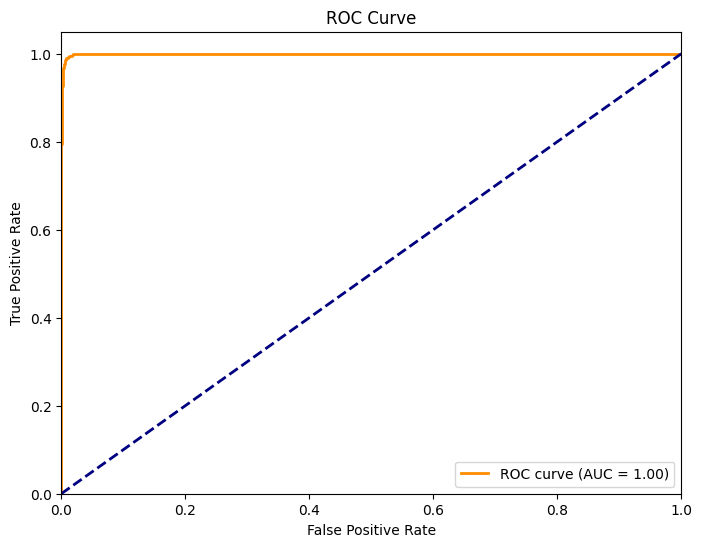


Accuracy: 0.9903

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     11549
           1       0.99      0.99      0.99     12309

    accuracy                           0.99     23858
   macro avg       0.99      0.99      0.99     23858
weighted avg       0.99      0.99      0.99     23858



In [25]:
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC-AUC Score: {roc_auc:.4f}")

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

<Figure size 1200x600 with 0 Axes>

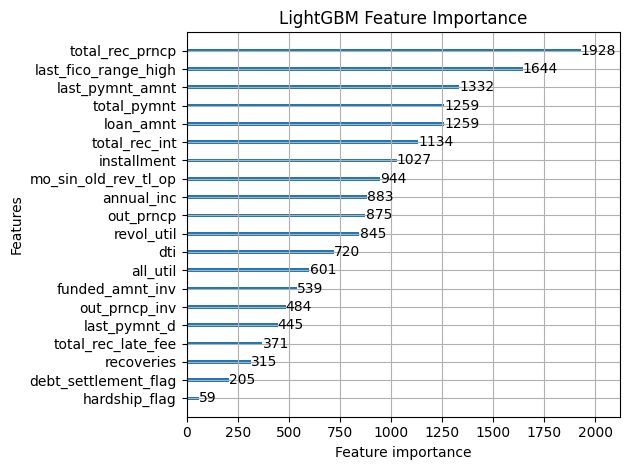

In [26]:
plt.figure(figsize=(12, 6))
lgb.plot_importance(model, max_num_features=20)
plt.title('LightGBM Feature Importance')
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

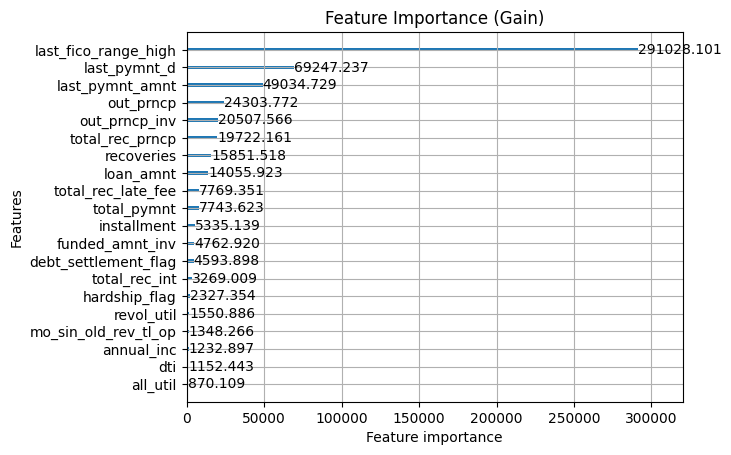

In [27]:
plt.figure(figsize=(10, 6))
lgb.plot_importance(model, importance_type='gain', max_num_features=20)
plt.title('Feature Importance (Gain)')
plt.show()

# **KNN**

In [33]:
def train_knn_model(X_train, y_train, n_neighbors=5):
    """
    Train a single KNN model.

    Parameters:
    X_train (array-like): Training features
    y_train (array-like): Training labels
    n_neighbors (int): Number of neighbors to use

    Returns:
    KNeighborsClassifier: Trained KNN model
    """
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    return knn

In [37]:
k_values=range(5, 21)
auc_scores = []

for k in k_values:
    model = train_knn_model(X_train, y_train, n_neighbors=k)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    auc = roc_auc_score(y_test, y_pred_proba)
    auc_scores.append(auc)

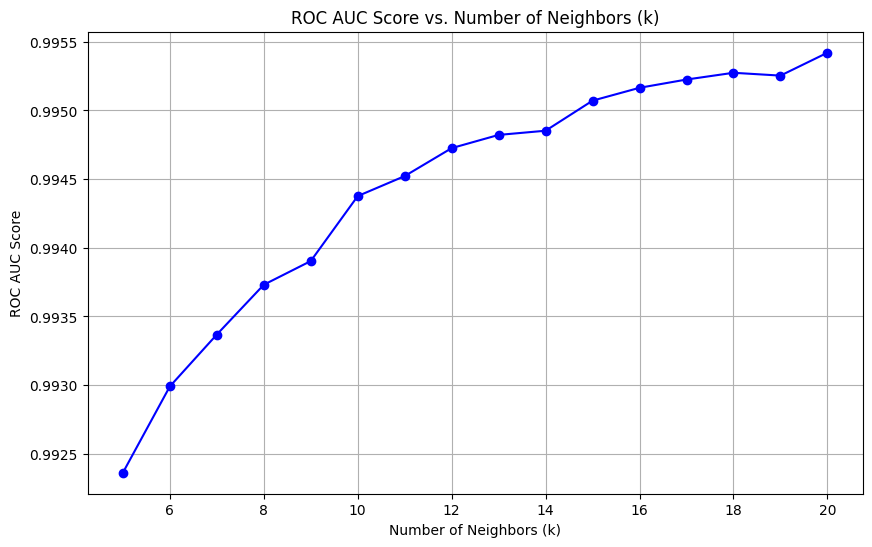

In [38]:
plt.figure(figsize=(10, 6))
plt.plot(k_values, auc_scores, marker='o', linestyle='-', color='b')
plt.title('ROC AUC Score vs. Number of Neighbors (k)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('ROC AUC Score')
plt.grid(True)
plt.show()

In [42]:
best_auc = max(auc_scores)
best_k = k_values[auc_scores.index(best_auc)]

print(f"\nBest ROC AUC Score: {best_auc:.4f} at k = {best_k}")



Best ROC AUC Score: 0.9954 at k = 20


In [41]:
y_pred_labels = (y_pred_proba >= 0.5).astype(int)

accuracy = accuracy_score(y_test, y_pred_labels)
print(f"\nAccuracy: {accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_labels))


Accuracy: 0.9792

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98     11549
           1       0.97      0.99      0.98     12309

    accuracy                           0.98     23858
   macro avg       0.98      0.98      0.98     23858
weighted avg       0.98      0.98      0.98     23858

